<a href="https://colab.research.google.com/github/Kaavyesh/Client-behavior-classification-in-Banking/blob/main/client_behavior_classification_in_banking_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/client behaviour classification in banking /bank-additional-full.csv'

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv(path,sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

age: Represents the age of the individual.

job: Indicates the occupation or job of the individual.

marital: Describes the marital status of the individual (e.g., married, single, divorced).

education: Specifies the educational level or qualification of the individual.

default: Indicates whether the individual has credit in default (yes/no).

housing: Shows whether the individual has a housing loan (yes/no).

loan: Represents whether the individual has a personal loan (yes/no).

contact: Specifies the type of communication used to contact the individual (e.g., cellular, telephone).

month: Indicates the last contact month of the year.

day_of_week: Specifies the last contact day of the week.

duration: Represents the duration of the last contact in seconds.

campaign: Indicates the number of contacts performed during this campaign.

pdays: Describes the number of days since the individual was last contacted.

previous: Specifies the number of contacts performed before this campaign.

poutcome: Represents the outcome of the previous marketing campaign.

emp.var.rate: Indicates the employment variation rate.

cons.price.idx: Describes the consumer price index.

cons.conf.idx: Represents the consumer confidence index.

euribor3m: Specifies the Euribor 3-month rate.

nr.employed: Indicates the number of employees.

y: This column is  a target variable,  where 'yes' and 'no' indicate the outcome of interest.

In [8]:
df.shape

(41188, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.duplicated().sum()

12

In [12]:
#lets make a copy of the data frame before we perform any changes on it
df1 = df.copy()

In [13]:
df1.drop_duplicates(keep='first',inplace = True)

In [14]:
df1.duplicated().sum()

0

selecting object dtypes

In [15]:
col_cat = df1.select_dtypes(include=['object']).columns.tolist()


In [16]:
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [17]:
#converting object dtypes to categorical
df1[col_cat] = df1[col_cat].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.id

In [18]:
df1['job'].unique()

['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']

In [19]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [20]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Features Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif
# Classificators
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [22]:
#converting categorical values tot integers using encoding
oe = OrdinalEncoder()
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
oe.fit(x[categorical])
x_cat_enc = oe.transform(x[categorical])

In [23]:
x_cat_enc

array([[3., 1., 0., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       [7., 1., 3., ..., 6., 1., 1.],
       ...,
       [5., 1., 6., ..., 7., 0., 1.],
       [9., 1., 5., ..., 7., 0., 1.],
       [5., 1., 5., ..., 7., 0., 0.]])

In [26]:
#tranforming array back to data frame
x_cat_enc = pd.DataFrame(x_cat_enc)
x_cat_enc.columns = categorical
x_cat_enc

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
41171,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41172,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
41173,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41174,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0


In [27]:
col_num = ['age', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler(feature_range = (0,1))
x_num_enc = scaler.fit_transform(x[col_num])

In [28]:
x_num_enc


array([[0.48148148, 0.05307035, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.49382716, 0.03029687, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.24691358, 0.04595364, 0.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.48148148, 0.03843026, 0.01818182, ..., 0.        , 0.08932215,
        0.        ],
       [0.33333333, 0.08987393, 0.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.7037037 , 0.04859699, 0.03636364, ..., 0.        , 0.08932215,
        0.        ]])

In [29]:
#tranforming the array back to data frame
x_num_enc = pd.DataFrame(x_num_enc)
x_num_enc.columns = col_num
x_num_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...,...,...
41171,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41172,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41173,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41174,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


In [31]:
#concatenate both num and categorical data frame
x_enc = pd.concat([x_num_enc,x_cat_enc],axis = 1)
x_enc

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,0.481481,0.053070,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,3.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
1,0.493827,0.030297,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7.0,1.0,3.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0
2,0.246914,0.045954,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7.0,1.0,3.0,0.0,2.0,0.0,1.0,6.0,1.0,1.0
3,0.283951,0.030704,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,1.0,1.0,0.0,0.0,0.0,1.0,6.0,1.0,1.0
4,0.481481,0.062424,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,7.0,1.0,3.0,0.0,0.0,2.0,1.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,0.691358,0.067914,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5.0,1.0,5.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41172,0.358025,0.077877,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
41173,0.481481,0.038430,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,5.0,1.0,6.0,0.0,2.0,0.0,0.0,7.0,0.0,1.0
41174,0.333333,0.089874,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,9.0,1.0,5.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0


In [32]:
#perform the same encoding on y
le = LabelEncoder()
le.fit(y)
y_enc = le.transform(y)
y_enc = pd.Series(y_enc)
y_enc.name = y.name

In [33]:
y_enc

0        0
1        0
2        0
3        0
4        0
        ..
41171    1
41172    0
41173    0
41174    1
41175    0
Name: y, Length: 41176, dtype: int64

#Feature selection

##Chi-Squared Statistic

In [49]:
best_features_1 = SelectKBest(score_func = chi2, k = 10)
fit1 = best_features_1.fit(x_enc,y_enc)
dfscores1 = pd.DataFrame(fit1.scores_)
dfcolumns1 = pd.DataFrame(x_enc.columns)

In [50]:
feature_scores = pd.concat([dfcolumns1,dfscores1],axis =1 )
feature_scores.columns = ['specs','scores']
print(feature_scores.nlargest(10,'scores')) # 10 features with largest scores

           specs      scores
8      euribor3m  890.235155
16       contact  547.778461
5   emp.var.rate  540.921063
9    nr.employed  502.482724
4       previous  441.387744
1       duration  357.984549
13       default  321.891101
12     education  167.446537
3          pdays  158.015941
19      poutcome   98.263330


##Mutual Information Statistic

In [53]:
best_features_2 = SelectKBest(score_func = mutual_info_classif,k=10)
fit2 = best_features_2.fit(x_enc,y_enc)
dfscores2 = pd.DataFrame(fit2.scores_)
dfcolumns2 = pd.DataFrame(x_enc.columns)

In [54]:
feature_score2 = pd.concat([dfcolumns2,dfscores2],axis = 1 )
feature_score2.columns = ['specs','scores']
print(feature_score2.nlargest(10,'scores'))

             specs    scores
1         duration  0.079001
8        euribor3m  0.072253
6   cons.price.idx  0.069397
7    cons.conf.idx  0.068195
9      nr.employed  0.063996
5     emp.var.rate  0.057656
19        poutcome  0.037850
3            pdays  0.036602
17           month  0.028155
4         previous  0.017878


##feature importance using tree classifier

In [55]:
model_tc = ExtraTreesClassifier()
model_tc.fit(x_enc,y_enc)

ExtraTreesClassifier()

In [56]:
print(model_tc.feature_importances_)

[0.08863081 0.26323853 0.05938449 0.05588976 0.01266423 0.03218985
 0.01865689 0.02253833 0.09817577 0.04021246 0.05822785 0.03462663
 0.05395635 0.01043262 0.02610304 0.01971182 0.01338705 0.01586248
 0.04900944 0.0271016 ]


In [57]:
feature_importance = pd.Series(model_tc.feature_importances_,index = x_enc.columns)
feature_importance.nlargest(10)

duration       0.263239
euribor3m      0.098176
age            0.088631
campaign       0.059384
job            0.058228
pdays          0.055890
education      0.053956
day_of_week    0.049009
nr.employed    0.040212
marital        0.034627
dtype: float64

##Co-relation matrix and heatmap

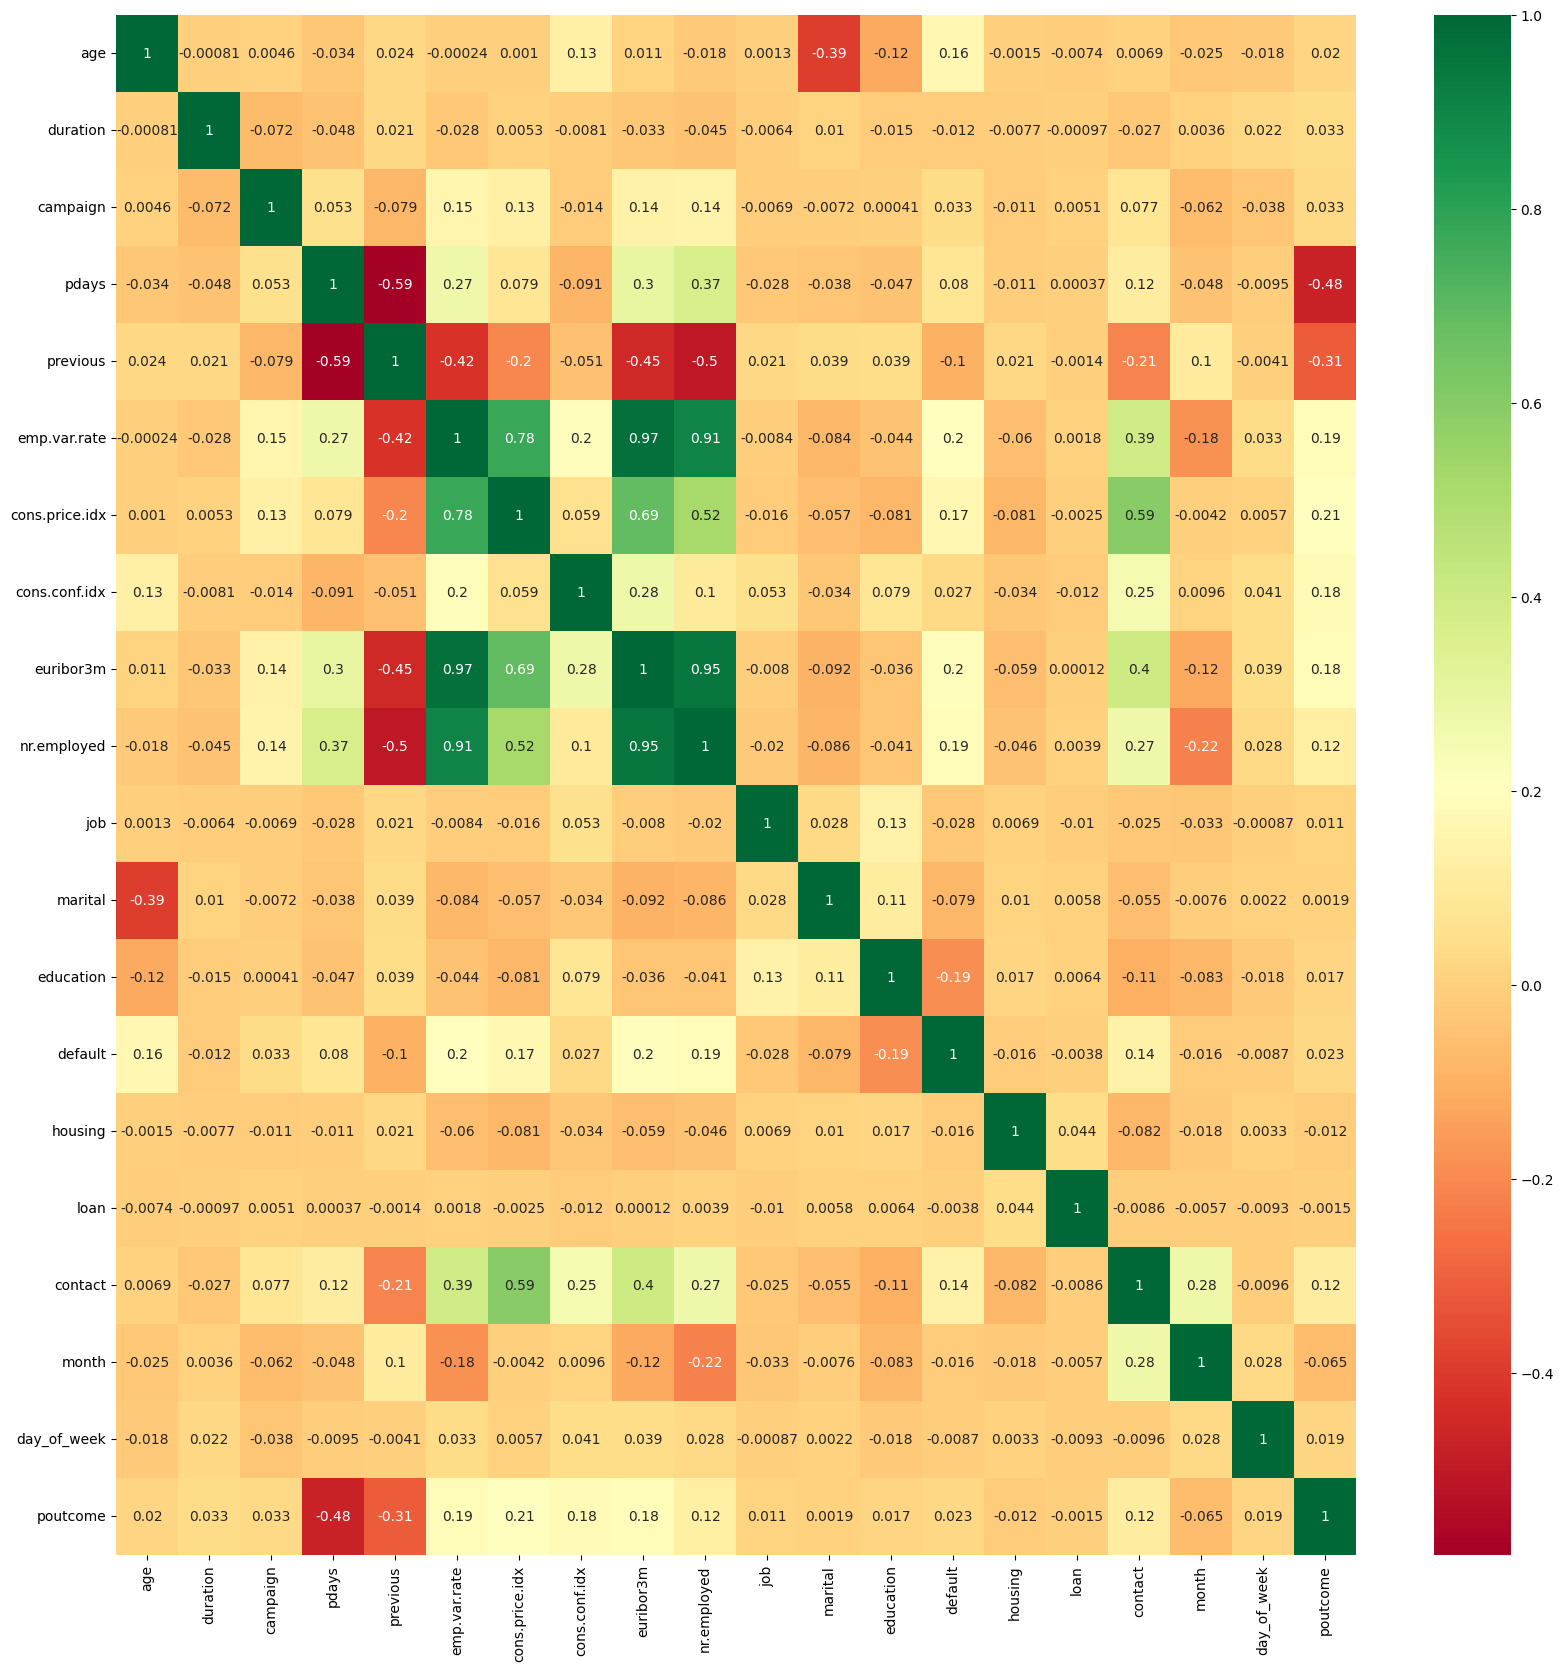

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = x_enc.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(x_enc[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#####As you can see fields 'euribor3m', 'emp.var.rate', 'nr.employed' strictly correlate each other. It mean that two of them must be removed from calculation because there are linear depedencies between them.

In [64]:
x_enc.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [65]:
col = ['age', 'duration', 'campaign', 'pdays', 'previous',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job',
       'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

In [66]:
x_enc = x_enc[col]

In [67]:
x_enc.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

##classification models

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_enc,y_enc,test_size=0.2 , random_state = 42 )
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(32940, 18) (32940,)
(8236, 18) (8236,)


Extra tree classifier

In [69]:
#fitting the model
model_tc = ExtraTreesClassifier()
model_tc.fit(x_train,y_train)


ExtraTreesClassifier()

In [70]:
y_pred = model_tc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

90.51724137931035


Decision Tree classifier

In [71]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_pred = model_dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

88.61097620203982


In [73]:
import graphviz
dot_data = tree.export_graphviz(model_dt,
               feature_names = col,
               class_names = y.unique(),
                                filled=True)

In [ ]:
graph = graphviz.Source(dot_data, format="png")
graph


The accuracy of decision is about 90%. we can predict if a client will subscribe or not using this model with 90% confidence .

In [76]:
x_enc.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

##checking the model performance on the important features generated by feature selection

In [78]:
chi_col = ['euribor3m','contact','previous','duration','education', 'default','pdays', 'poutcome']
mutual_col = [ 'duration','euribor3m','cons.price.idx','cons.conf.idx','poutcome', 'month','pdays', 'previous']
dt_col = ['duration','euribor3m','age', 'campaign','job', 'pdays','education','day_of_week','marital']

In [79]:
best_feature = [chi_col,mutual_col,dt_col]

In [80]:
for feature in best_feature :
  x_enc_new = x_enc[feature]
  X_train,X_test,Y_train,Y_test = train_test_split(x_enc_new,y_enc,test_size = 0.2 , random_state = 42)
  model_dt = DecisionTreeClassifier()
  model_dt.fit(X_train,Y_train)
  y_pred_new = model_dt.predict(X_test)
  accuracy_sco = accuracy_score(Y_test,y_pred_new)
  print(f"Features: {feature}, Accuracy Score: {accuracy_sco}")


Features: ['euribor3m', 'contact', 'previous', 'duration', 'education', 'default', 'pdays', 'poutcome'], Accuracy Score: 0.8819815444390481
Features: ['duration', 'euribor3m', 'cons.price.idx', 'cons.conf.idx', 'poutcome', 'month', 'pdays', 'previous'], Accuracy Score: 0.8858669256920836
Features: ['duration', 'euribor3m', 'age', 'campaign', 'job', 'pdays', 'education', 'day_of_week', 'marital'], Accuracy Score: 0.8852598348712968
